<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Fawwaz !

Perkenalkan saya disini sebagai Code Reviewers, disini dengan senang hati saya akan mereview tugas Fawwaz ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Fawwaz dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# Deskripsi Proyek

Rusty Bargain adalah perusahaan jual beli mobil bekas yang sedang mengembangkan sebuah aplikasi untuk menarik pembeli baru. Dalam aplikasi tersebut, Anda bisa dengan cepat mengetahui nilai pasar mobil Anda. Anda memiliki akses ke data historis, spesifikasi teknis kendaraan, versi model kendaraan, dan harga kendaraan. Tugas Anda adalah membuat suatu model yang mampu menentukan nilai pasar mobil. 

Rusty Bargain tertarik pada:

- kualitas prediksi;
- kecepatan model dalam memprediksi;
- waktu yang diperlukan untuk melatih model

# Instruksi Proyek

   - Simpan dan amati datanya.
   - Latih model yang berbeda dengan berbagai hyperparameter (Anda harus membuat setidaknya dua model yang berbeda, tetapi lebih banyak lebih baik. Ingat, berbagai implementasi dari gradient boosting tidak dihitung sebagai model yang berbeda). Poin utama dari langkah ini adalah untuk membandingkan metode-metode gradient boosting dengan random forest, decision tree, dan regresi linear.
   - Analisis kecepatan dan kualitas model.

Catatan:

   - Gunakan metrik RMSE untuk mengevaluasi model.
   - Regresi linear memang tidak terlalu cocok untuk mengatur hyperparameter, tetapi regresi linear merupakan model yang tepat untuk melakukan sanity check dibandingkan metode lainnya. Jika kinerja gradient boosting tidak lebih baik daripada regresi linear, berarti ada sesuatu yang salah.
   - Secara mandiri, pelajari library LightGBM dan gunakan tool yang ada di dalam library tersebut untuk membuat model gradient boosting.
   - Idealnya, tugas Anda harus menyertakan regresi linear untuk melakukan sanity check, algoritme berbasis pohon dengan penyetelan hyperparameter (sebaiknya random forest), LightGBM dengan penyetelan hyperparameter (coba beberapa set), serta CatBoost dan XGBoost dengan penyetelan hyperparameter (opsional).
   - Perhatikan pengkodean terhadap fitur-fitur kategorik untuk algoritme sederhana. LightGBM dan CatBoost memang mengimplementasikannya, tetapi XGBoost membutuhkan OHE.
   - Anda bisa menggunakan perintah khusus untuk mengetahui waktu pemrosesan suatu sel kode di Jupyter Notebook. Temukan perintah khusus tersebut.
   - Mengingat pelatihan model gradient boosting bisa membutuhkan waktu yang lama, ubah hanya beberapa parameter model.
   - Jika Jupyter Notebook berhenti bekerja, hapus variabel yang tidak diperlukan menggunakan operator del: del features_train
   

# Daftar Konten

* [Deskripsi Proyek](#Deskripsi-Proyek)
* [Instruksi Proyek](#Instruksi-Proyek)
* [Pendahuluan](#Pendahuluan)
    * [Tujuan](#Tujuan)
    * [Tahapan](#Tahapan)
* [Inisialisasi](#Inisialisasi)
* [Persiapan Data](#Persiapan-Data)
* [Pra- Pemrosesan Data](#Pra--Pemrosesan-Data)
* [Pelatihan dan Analisis Model](#Pelatihan-dan-Analisis-Model)
* [Kesimpulan Umum](#Kesimpulan-Umum)

## Pendahuluan
Dalam proyek ini kita akan melakukan analisis terhadap data historis kendaraan membuat model yang mampu menentukan nilai pasar mobil dengan kualitas prediksi, kecepatan model dalam memprediksi, dan waktu yang diperlukan untuk melatih model menjadi pertimbangan utamanya.
### Tujuan
Membuat suatu model yang mampu menentukan nilai pasar mobil.

### Tahapan 
Pertama kita akan mengekplorasi data yang ada baik dataset untuk mempelajari distribusi dan pola- pola yang ada. Kita juga harus mengecek nilai yang ada apakah ada nilai yang hilang atau anomali lainnya dan melakukan pra- pemrosesan data. Kemudian kita akan menganalisis fitur- fitur yang terdapat pada dataset.

Selanjutnya kita akan melakukan pemodelan dengan beberapa estimator seperti decision tree, random forest, dan linear regression dan juga gradien boosting estimator seperti lightGBM, catboost, dan xgboost.

Langkah terakhir adalah melakukan evaluasi dari semua hasil yang ada untuk mendapatkan model dengan kriteria yang diharapkan.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Inisialisasi
Import library yang akan digunakan.

In [134]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Persiapan Data

In [135]:
df = pd.read_csv('/datasets/car_data.csv')

In [136]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [138]:
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [139]:
def missing(df):
    missing_data = df.isna()
    plt.figure(figsize=(20, 20))
    sns.heatmap(missing_data, cmap='viridis')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.title('Missing Data Patterns')
    plt.show()

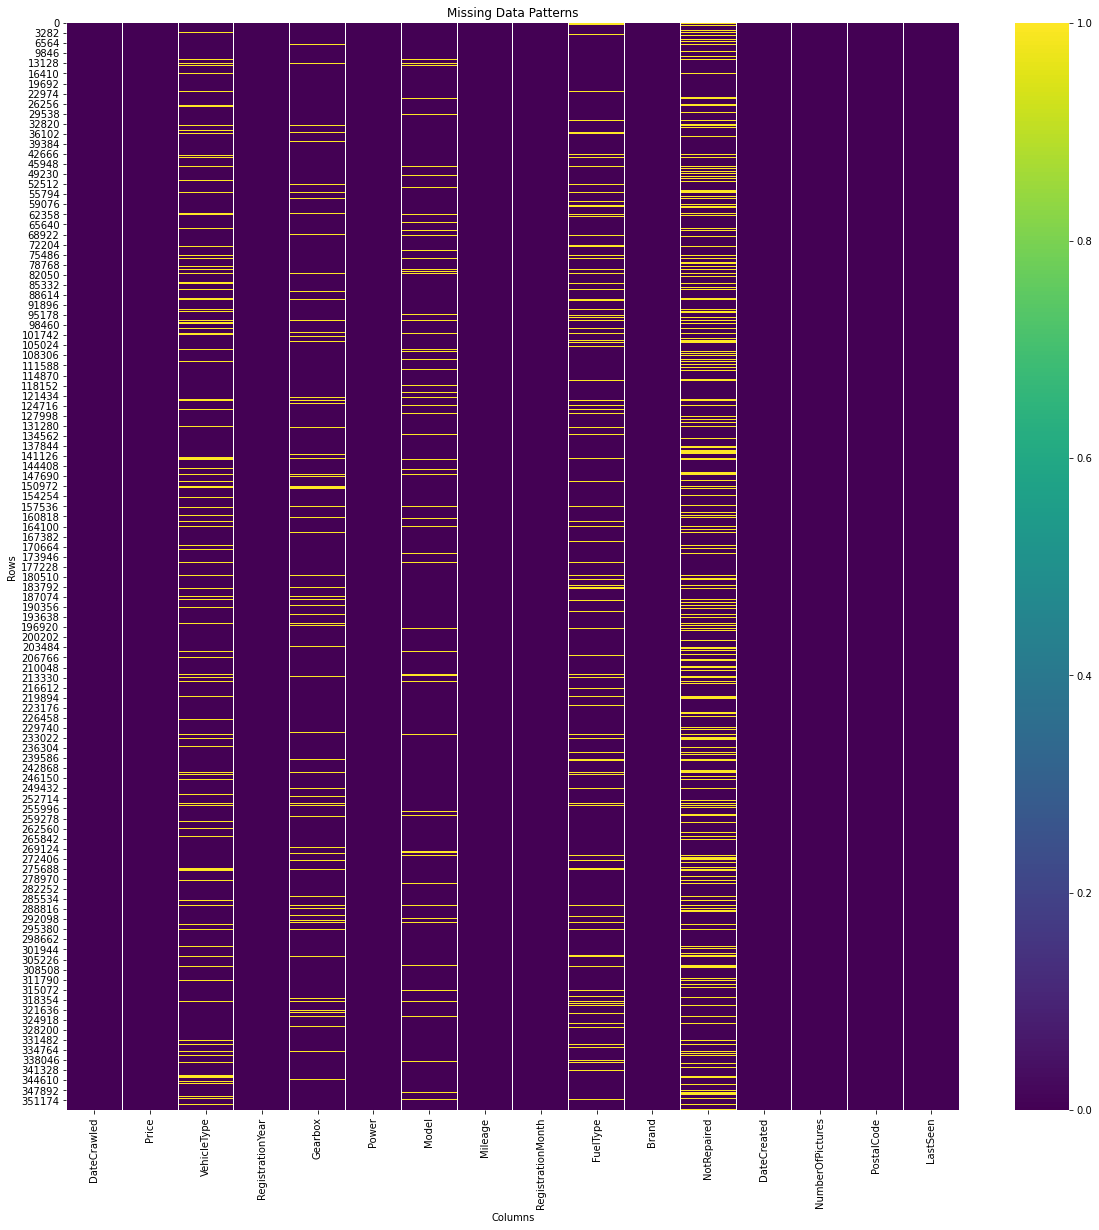

In [140]:
missing(df)

In [141]:
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [142]:
df.isna().sum() / len(df) * 100

DateCrawled           0.000000
Price                 0.000000
VehicleType          10.579368
RegistrationYear      0.000000
Gearbox               5.596709
Power                 0.000000
Model                 5.560588
Mileage               0.000000
RegistrationMonth     0.000000
FuelType              9.282697
Brand                 0.000000
NotRepaired          20.079070
DateCreated           0.000000
NumberOfPictures      0.000000
PostalCode            0.000000
LastSeen              0.000000
dtype: float64

In [143]:
df.duplicated().sum()

262

In [144]:
df.shape

(354369, 16)

Dataset car_data terdiri dari 354369 dan 16 baris. Terdapat 262 baris duplikat dan 5 kolom dengan nilai yang hilang dengan kolom not repaired memiliki sekitar 20% nilai yang hilang pada kolom tersebut. Mari kita eksplorasi lebih lanjut data setiap kolomnya.

In [145]:
df.DateCrawled.value_counts()

05/03/2016 14:25    66
05/03/2016 14:26    59
16/03/2016 18:49    55
20/03/2016 11:50    54
05/03/2016 17:49    54
                    ..
15/03/2016 17:27     1
07/03/2016 08:44     1
06/03/2016 13:23     1
30/03/2016 23:20     1
08/03/2016 13:07     1
Name: DateCrawled, Length: 15470, dtype: int64

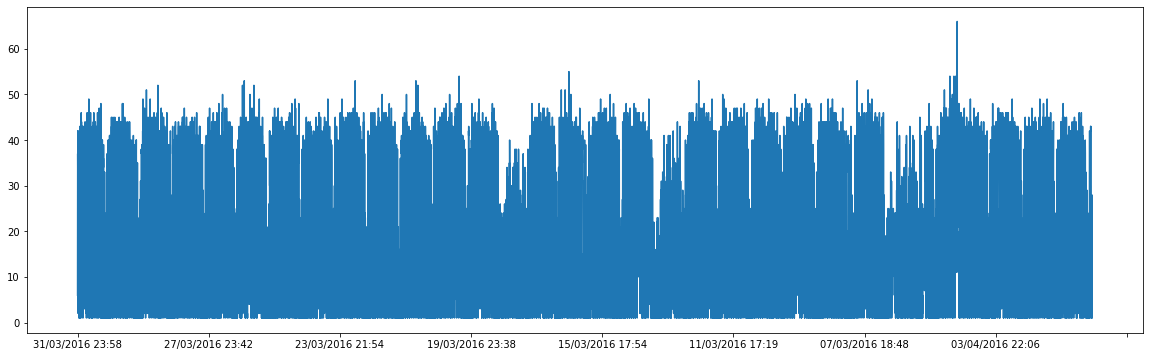

In [146]:
plt.figure(figsize=(20,6))
df.DateCrawled.value_counts().sort_index(ascending=False).plot(x='DateCrawled');

In [147]:
df.Price.value_counts()

0        10772
500       5670
1500      5394
1000      4649
1200      4594
         ...  
13180        1
10879        1
2683         1
634          1
8188         1
Name: Price, Length: 3731, dtype: int64

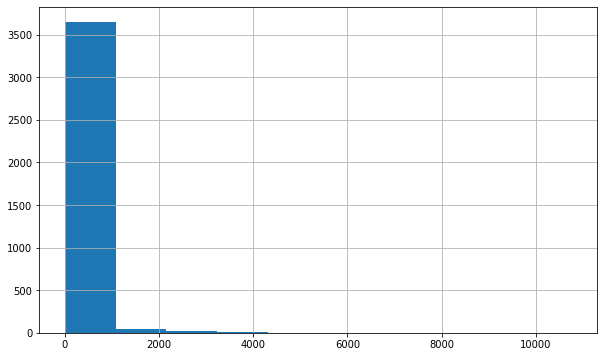

In [148]:
plt.figure(figsize=(10,6))
df.Price.value_counts().hist();

In [149]:
df.Price.value_counts()

0        10772
500       5670
1500      5394
1000      4649
1200      4594
         ...  
13180        1
10879        1
2683         1
634          1
8188         1
Name: Price, Length: 3731, dtype: int64

In [150]:
df.Price.describe()

count    354369.000000
mean       4416.656776
std        4514.158514
min           0.000000
25%        1050.000000
50%        2700.000000
75%        6400.000000
max       20000.000000
Name: Price, dtype: float64

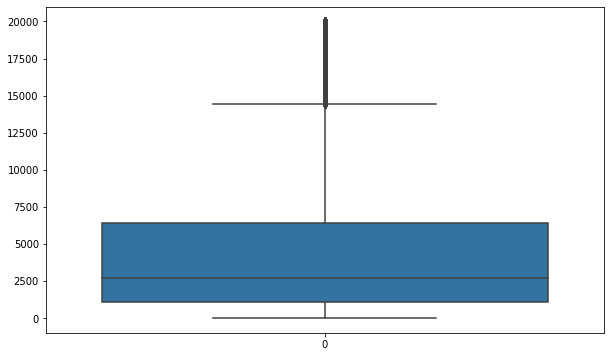

In [151]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.Price);

In [152]:
(10772) / df.Price.shape[0] * 100

3.0397692800442475

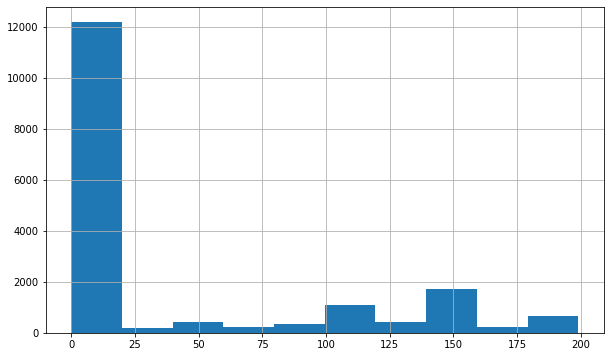

In [153]:
plt.figure(figsize=(10,6))
df[df['Price'] < 200]['Price'].hist();

In [154]:
df[df['Price'] == 50][['Model', 'Brand', 'RegistrationYear']].sort_values(by='RegistrationYear', ascending=False)

,Model,Brand,RegistrationYear
257793,other,hyundai,9999
50141,911,porsche,9999
338829,golf,volkswagen,3000
83145,twingo,renault,2017
194185,twingo,renault,2017
...,...,...,...
352221,NaN,sonstige_autos,1970
139429,NaN,sonstige_autos,1960
124042,NaN,sonstige_autos,1958
144388,kaefer,volkswagen,1910


50 euro untuk ford fiesta tahun 2016 ?

Pada kolom price terdapat 10772 baris atau sekitar 3% dari total baris pada kolom tersebut memiliki nilai 0.

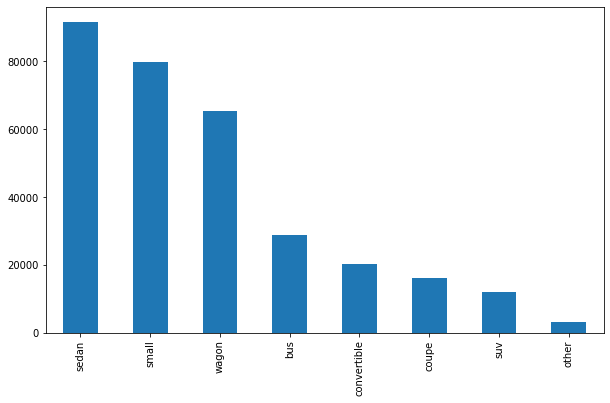

In [155]:
plt.figure(figsize=(10,6))
df.VehicleType.value_counts().plot(kind='bar');

In [156]:
df.RegistrationYear.value_counts()

2000    24490
1999    22728
2005    22109
2001    20124
2006    19900
        ...  
4100        1
1200        1
5300        1
8888        1
2290        1
Name: RegistrationYear, Length: 151, dtype: int64

In [157]:
df['Price'] = df['Price'].astype(int)

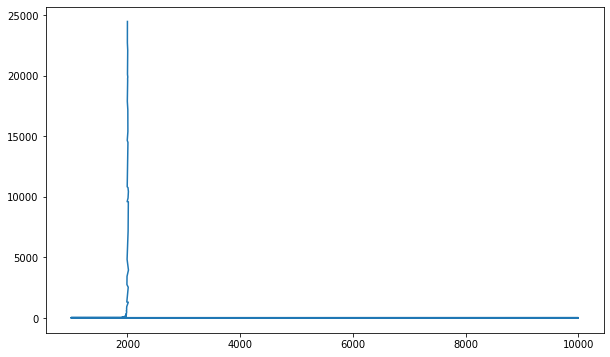

In [158]:
plt.figure(figsize=(10,6))
df.RegistrationYear.value_counts().plot(kind='line');

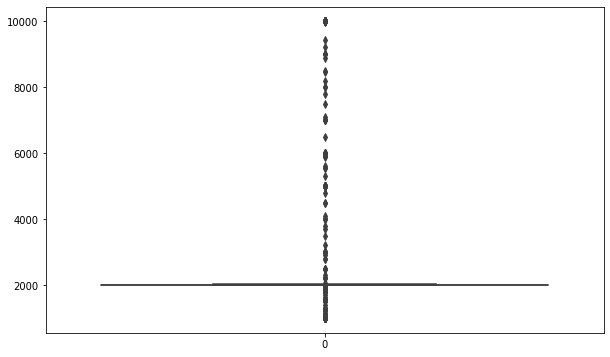

In [159]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df['RegistrationYear']);

In [160]:
df.RegistrationYear.describe()

count    354369.000000
mean       2004.234448
std          90.227958
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: RegistrationYear, dtype: float64

In [161]:
df[(df['RegistrationYear'] <= 2019) & (df['RegistrationYear'] >= 1800)]['RegistrationYear'].shape[0]

354203

In [162]:
df[(df['RegistrationYear'] <= 2019) & (df['RegistrationYear'] >= 1800)]['RegistrationYear'].shape[0] / df.RegistrationYear.shape[0] *100

99.9531561733673

In [163]:
df[(df['RegistrationYear'] <= 2019) & (df['RegistrationYear'] >= 1800)]['RegistrationYear'].value_counts().sort_index()

1800        5
1910      101
1915        1
1919        1
1920        1
        ...  
2015     1302
2016     9599
2017    10441
2018     3959
2019       25
Name: RegistrationYear, Length: 99, dtype: int64

In [164]:
df[(df['RegistrationYear'] <= 2019) & (df['RegistrationYear'] >= 1800)]['RegistrationYear'].describe()

count    354203.000000
mean       2003.081922
std           7.574892
min        1800.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        2019.000000
Name: RegistrationYear, dtype: float64

Pada kolom registration year ada beberapa baris yang memiliki nilai diatas 2019 dan dibawah 1800 yaitu tahun sebelum mobil mulai populer.

In [165]:
df.Gearbox.value_counts()

manual    268251
auto       66285
Name: Gearbox, dtype: int64

In [166]:
df.Power.describe()

count    354369.000000
mean        110.094337
std         189.850405
min           0.000000
25%          69.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: Power, dtype: float64

In [167]:
df.Power.value_counts(normalize=True)*100

0        11.351162
75        6.779092
60        4.486002
150       4.117177
101       3.752586
           ...    
323       0.000282
3454      0.000282
1056      0.000282
13636     0.000282
1158      0.000282
Name: Power, Length: 712, dtype: float64

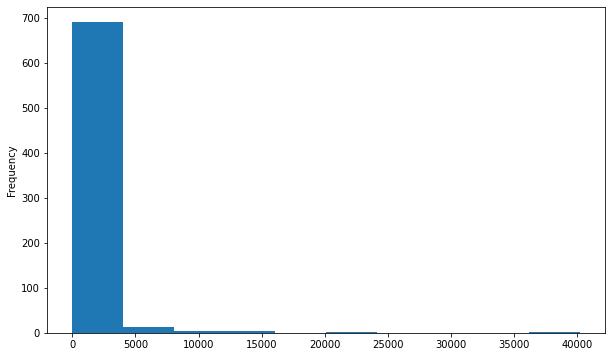

In [168]:
plt.figure(figsize=(10,6))
df.Power.value_counts().plot(kind='hist');

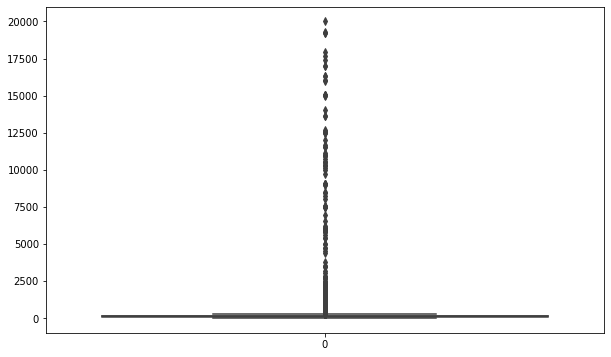

In [169]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df['Power']);

In [170]:
df['Power'].shape

(354369,)

In [171]:
df[df['RegistrationYear'] <= 2019]['RegistrationYear'].shape[0]

354264

In [172]:
df[(df['Power'] <= 2000) & (df['Power'] > 0)]['Power'].shape

(314024,)

In [173]:
df[(df['Power'] <= 2000) & (df['Power'] > 0)]['Power'].shape[0] / df['Power'].shape[0] * 100

88.61497478616923

Kolom power memiliki nilai maksimum 20000, jika satuan nilai untuk Power adalah hp (tenaga kuda) maka ada beberapa mobil dengan tenaga diatas 10000 hp sedangkan mobil dengan tenaga diatas 2000 hp sangat jarang ditemukan. Jumlah baris pada kolom power dengan nilai lebih kecil sama dengan 2000 dan lebih besar dari 0 sekitar 88.6%.

In [174]:
df.Model.value_counts()

golf                  29232
other                 24421
3er                   19761
polo                  13066
corsa                 12570
                      ...  
i3                        8
rangerover                4
serie_3                   4
range_rover_evoque        2
serie_1                   2
Name: Model, Length: 250, dtype: int64

In [175]:
df.Model.nunique()

250

In [176]:
df.Model.unique()

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'other', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza', 'mustang',
       'eos', 'touran', 'getz', 'a3', 'almera', 'megane', 'lupo', 'r19',
       'zafira', 'caddy', 'mondeo', 'cordoba', 'colt', 'impreza',
       'vectra', 'berlingo', 'tiguan', 'i_reihe', 'espace', 'sharan',
       '6_reihe', 'panda', 'up', 'seicento', 'ceed', '5_reihe', 'yeti',
       'octavia', 'mii', 'rx_reihe', '6er', 'modus', 'fox'

In [177]:
df.Mileage.value_counts()

150000    238209
125000     36454
100000     14882
90000      11567
80000      10047
70000       8593
60000       7444
5000        6397
50000       6232
40000       4911
30000       4436
20000       3975
10000       1222
Name: Mileage, dtype: int64

In [178]:
df.Mileage.describe()

count    354369.000000
mean     128211.172535
std       37905.341530
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: Mileage, dtype: float64

In [179]:
df.RegistrationMonth.value_counts()

0     37352
3     34373
6     31508
4     29270
5     29153
7     27213
10    26099
12    24289
11    24186
9     23813
1     23219
8     22627
2     21267
Name: RegistrationMonth, dtype: int64

In [180]:
df[df['RegistrationMonth'] == 0]['RegistrationMonth'].shape[0] / df['RegistrationMonth'].shape[0] *100

10.540425375808832

Pada kolom registration month terdapat nilai 0 dengan komposisi sekitar 10.5% dari total data.

In [181]:
df.FuelType.value_counts()

petrol      216352
gasoline     98720
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64

In [182]:
df.Brand.value_counts()

volkswagen        77013
opel              39931
bmw               36914
mercedes_benz     32046
audi              29456
ford              25179
renault           17927
peugeot           10998
fiat               9643
seat               6907
mazda              5615
skoda              5500
smart              5246
citroen            5148
nissan             4941
toyota             4606
hyundai            3587
sonstige_autos     3374
volvo              3210
mini               3202
mitsubishi         3022
honda              2817
kia                2465
suzuki             2323
alfa_romeo         2314
chevrolet          1754
chrysler           1439
dacia               900
daihatsu            806
subaru              762
porsche             758
jeep                677
trabant             589
land_rover          545
daewoo              542
saab                526
jaguar              505
rover               486
lancia              471
lada                225
Name: Brand, dtype: int64

In [183]:
df.Brand.unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'suzuki', 'lancia', 'toyota', 'chevrolet', 'dacia',
       'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar', 'daewoo',
       'porsche', 'rover', 'land_rover', 'lada'], dtype=object)

In [184]:
df.Brand.nunique()

40

In [185]:
df.NotRepaired.value_counts()

no     247161
yes     36054
Name: NotRepaired, dtype: int64

In [186]:
df.DateCreated.value_counts()

03/04/2016 00:00    13719
04/04/2016 00:00    13317
20/03/2016 00:00    12918
12/03/2016 00:00    12840
21/03/2016 00:00    12691
                    ...  
27/12/2015 00:00        1
03/01/2016 00:00        1
12/11/2015 00:00        1
02/11/2015 00:00        1
09/09/2015 00:00        1
Name: DateCreated, Length: 109, dtype: int64

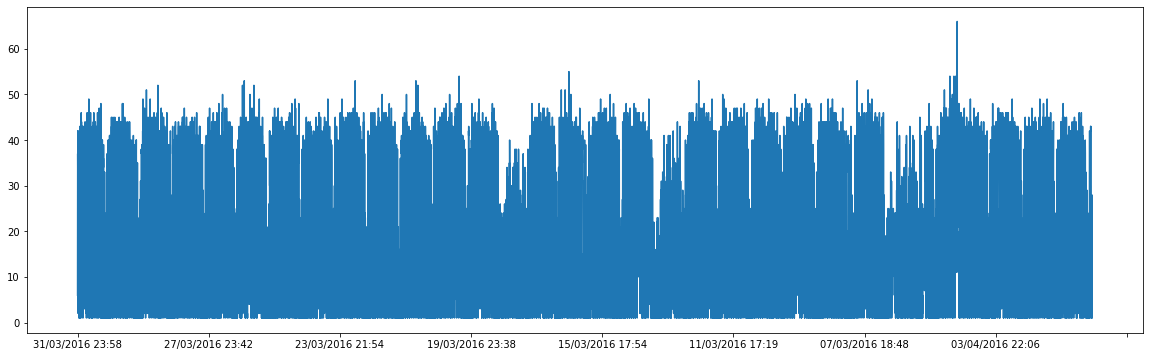

In [187]:
plt.figure(figsize=(20,6))
df.DateCrawled.value_counts().sort_index(ascending=False).plot(x='DateCrawled');

In [188]:
df.NumberOfPictures.value_counts()

0    354369
Name: NumberOfPictures, dtype: int64

In [189]:
df.PostalCode.value_counts()

10115    819
65428    613
66333    343
32257    317
44145    317
        ... 
21782      1
9517       1
29367      1
38325      1
82404      1
Name: PostalCode, Length: 8143, dtype: int64

In [190]:
df.PostalCode.nunique()

8143

In [191]:
df.LastSeen.value_counts()

07/04/2016 07:16    654
07/04/2016 06:45    646
06/04/2016 09:17    641
07/04/2016 05:45    640
06/04/2016 04:45    640
                   ... 
24/03/2016 17:12      1
07/03/2016 09:51      1
08/03/2016 13:53      1
28/03/2016 01:32      1
15/03/2016 17:31      1
Name: LastSeen, Length: 18592, dtype: int64

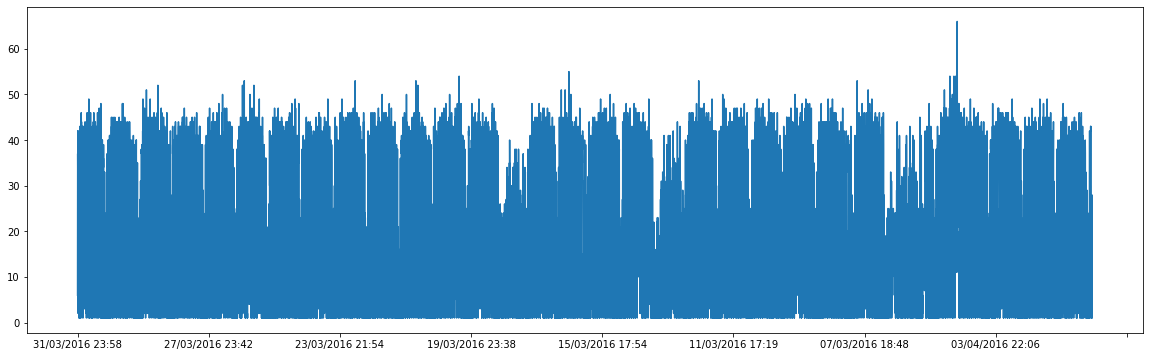

In [192]:
plt.figure(figsize=(20,6))
df.DateCrawled.value_counts().sort_index(ascending=False).plot(x='DateCrawled');

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

- Kolom DateCrawled, DateCreated, dan Last seen dapat diubah menjadi datetime.
- Terdapat beberapa nilai yang hilang dengan persentase yang cukup besar sekitar 20% pada kolom notrepaired.
- Terdapat beberapa kolom dengan nilai minimum dan maksimum yang mengandung anomali.
- Kolom NumberofPictures tidak memiliki info yang berarti.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Pra- Pemrosesan Model

### Nilai yang Hilang

In [194]:
df.isna().sum() / len(df) * 100

DateCrawled           0.000000
Price                 0.000000
VehicleType          10.579368
RegistrationYear      0.000000
Gearbox               5.596709
Power                 0.000000
Model                 5.560588
Mileage               0.000000
RegistrationMonth     0.000000
FuelType              9.282697
Brand                 0.000000
NotRepaired          20.079070
DateCreated           0.000000
NumberOfPictures      0.000000
PostalCode            0.000000
LastSeen              0.000000
dtype: float64

Kita akan mengisi nilai yang hilang pada beberapa kolom dengan asumsi baris tersebut memiliki nilai yang sama atau mirip dengan kolom lainya.

Untuk kolom notrepaired diasumsikan default untuk jawannya adalah no.

In [195]:
df['NotRepaired'] = df['NotRepaired'].fillna('no')

In [196]:
df['Model'] = df.groupby(['Brand','RegistrationYear'])['Model'].transform(lambda x: x.fillna((x.mode()[0] if not x.mode().empty else "Empty")))

In [197]:
df['VehicleType'] = df.groupby(['Brand','Model'])['VehicleType'].transform(lambda x: x.fillna((x.mode()[0] if not x.mode().empty else "Empty")))

In [198]:
df['FuelType'] = df.groupby(['Brand','Model'])['FuelType'].transform(lambda x: x.fillna((x.mode()[0] if not x.mode().empty else "Empty")))

In [199]:
df['Gearbox'] = df.groupby(['Brand','RegistrationYear'])['Gearbox'].transform(lambda x: x.fillna((x.mode()[0] if not x.mode().empty else "Empty")))

In [200]:
df = df.replace('Empty',np.nan)

In [201]:
df.isna().sum() / len(df) * 100

DateCrawled          0.000000
Price                0.000000
VehicleType          0.007055
RegistrationYear     0.000000
Gearbox              0.058414
Power                0.000000
Model                0.971304
Mileage              0.000000
RegistrationMonth    0.000000
FuelType             0.003951
Brand                0.000000
NotRepaired          0.000000
DateCreated          0.000000
NumberOfPictures     0.000000
PostalCode           0.000000
LastSeen             0.000000
dtype: float64

Ada beberapa baris nilai yang hilang yang masih tersisa, karena jumlahnya dibawah 1 persen makan akan di- drop.

In [202]:
df = df.dropna().reset_index(drop=True)

In [203]:
df.isna().sum() / len(df) * 100

DateCrawled          0.0
Price                0.0
VehicleType          0.0
RegistrationYear     0.0
Gearbox              0.0
Power                0.0
Model                0.0
Mileage              0.0
RegistrationMonth    0.0
FuelType             0.0
Brand                0.0
NotRepaired          0.0
DateCreated          0.0
NumberOfPictures     0.0
PostalCode           0.0
LastSeen             0.0
dtype: float64

In [204]:
df.duplicated().sum()

305

In [205]:
df = df.drop_duplicates().reset_index(drop=True)

In [206]:
df.duplicated().sum()

0

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350486 entries, 0 to 350485
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        350486 non-null  object
 1   Price              350486 non-null  int64 
 2   VehicleType        350486 non-null  object
 3   RegistrationYear   350486 non-null  int64 
 4   Gearbox            350486 non-null  object
 5   Power              350486 non-null  int64 
 6   Model              350486 non-null  object
 7   Mileage            350486 non-null  int64 
 8   RegistrationMonth  350486 non-null  int64 
 9   FuelType           350486 non-null  object
 10  Brand              350486 non-null  object
 11  NotRepaired        350486 non-null  object
 12  DateCreated        350486 non-null  object
 13  NumberOfPictures   350486 non-null  int64 
 14  PostalCode         350486 non-null  int64 
 15  LastSeen           350486 non-null  object
dtypes: int64(7), object(

In [208]:
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,350486.000000,350486.000000,350486.000000,350486.000000,350486.000000,350486.0,350486.000000
mean,4411.387861,2003.380226,110.280724,128626.464395,5.730072,0.0,50540.341643
std,4503.197311,31.738697,188.902257,37400.354720,3.721096,0.0,25763.127409
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1099.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30169.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49429.000000
75%,6399.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71088.000000
max,20000.000000,9000.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [209]:
len(df) / 354369 * 100

98.90424952521242

Setelah dilakukan pemrosesan pada data, data yang tersisa sekitar 98.9% dari total data sebelumnya.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Nilai Anomali

Terdapat beberapa nilai anomali pada kolom price, power, registration year, dan registration month.

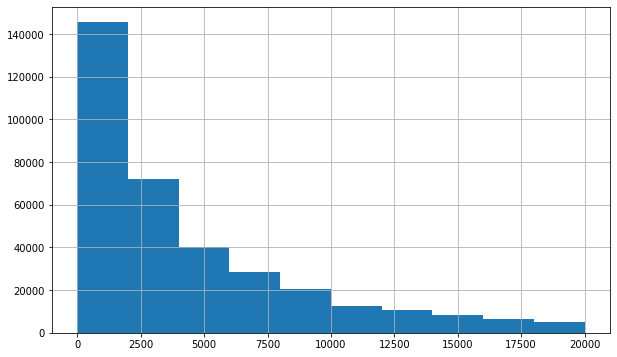

In [210]:
plt.figure(figsize=(10,6))
df['Price'].hist();

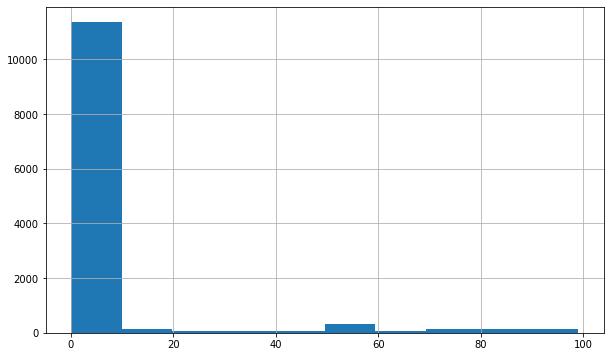

In [211]:
plt.figure(figsize=(10,6))
df[df['Price'] < 100]['Price'].hist();

In [212]:
df[df['Price'] < 100]['Price'].shape[0] / len(df) * 100

3.5861632133665826

Ada 3% data dengan harga mobil dibawah 100 euro.

In [213]:
df = df[df['Price'] >= 100]

Diasumsikan harga mobil termurah 100 euro, maka kita mengambil nilan lebih besar sama dengan 100 untuk kolom price, karena jumlah data dengan harga dibawah 100 euro hanya 3% .

In [214]:
df.RegistrationYear.describe()

count    337917.000000
mean       2003.439608
std          25.956405
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        8200.000000
Name: RegistrationYear, dtype: float64

In [215]:
(df[(df['RegistrationYear'] <= 2019) & (df['RegistrationYear'] >= 1800)]['RegistrationYear'].shape[0] / len(df) *100)

99.99171394158921

In [216]:
df = df[(df['RegistrationYear'] <= 2019) & (df['RegistrationYear'] >= 1800)]

Pada kolom registration year diasumsikan tahun yang diambil dari 1800- 2019, karena jumlahnya cukup kecil dan mobil dengan tahun diatas 2023 terlihat tidak masuk akal sedangkan mobil dibawah tahun 1800 tidak terlihat representatif.

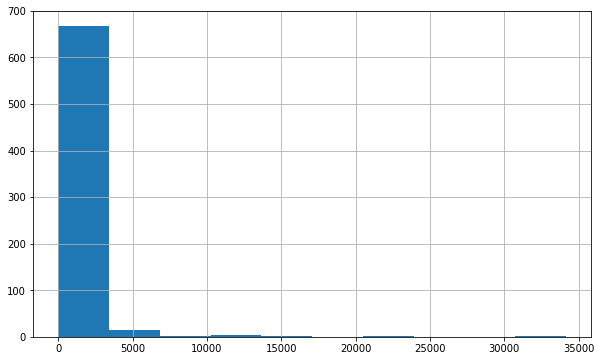

In [217]:
plt.figure(figsize=(10,6))
df['Power'].value_counts().hist();

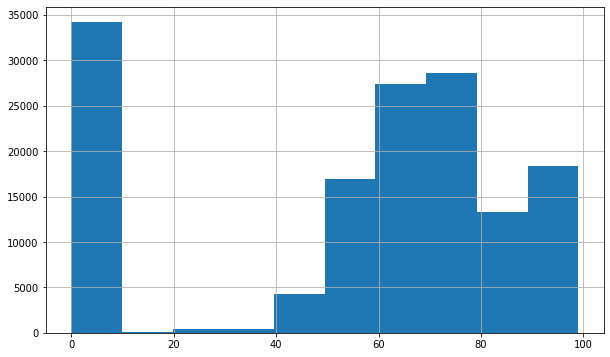

In [218]:
plt.figure(figsize=(10,6))
df[df['Power'] < 100]['Power'].hist();

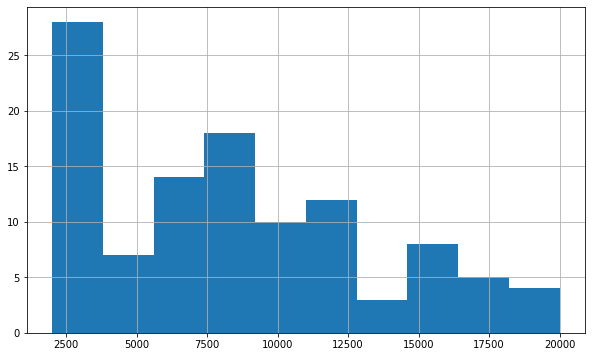

In [219]:
plt.figure(figsize=(10,6))
df[df['Power'] > 2000]['Power'].hist();

In [220]:
df[(df['Power'] > 2000)].shape[0] / len(df) * 100

0.032259114679672914

In [221]:
df[(df['Power'] < 100)].shape[0] / len(df) * 100

42.596829136195616

In [222]:
df[(df['Power'] == 0)].shape[0] / len(df) * 100

10.102134132806928

In [223]:
df[(df['Power'] <= 2000) & (df['Power'] >= 100)]['Power'].shape[0] / df['Power'].shape[0] * 100

57.37091174912471

In [224]:
df = df[(df['Power'] <= 2000)]

Tenaga atau power pada mobil berdasarkan research google dan chatgpt maksimum sekitar 2000 hp. Ada beberapa mobil dengan tenaga dibawah 100 pada data dan mayoritas memiliki tenaga 0 hp.

In [225]:
df_tmp = df[df['Power'] == 0]

In [226]:
df_tmp['modyear'] = list(zip(df_tmp['Model'], df_tmp['RegistrationYear']))

/tmp/ipykernel_149/614652097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp['modyear'] = list(zip(df_tmp['Model'], df_tmp['RegistrationYear']))


In [227]:
dict_power = df.groupby(['Model', 'RegistrationYear'])['Power'].agg(lambda x: x.value_counts().index[0]).to_dict()
len(dict_power)

5066

In [228]:
df_tmp['Power'] = df_tmp['modyear'].map(dict_power)

/tmp/ipykernel_149/3067235599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp['Power'] = df_tmp['modyear'].map(dict_power)


In [229]:
df_tmp['Power'].value_counts().sort_index()

0      9173
18       14
26       61
34       21
39        2
       ... 
343       6
371       1
387       1
400       1
500       1
Name: Power, Length: 156, dtype: int64

In [230]:
9173 / len(df) *100

2.7156729232044525

In [231]:
df.loc[df['Power'] == 0, 'Power'] = df_tmp['Power']

In [232]:
df[(df['Power'] == 0)].shape[0] / len(df) * 100

2.7156729232044525

In [233]:
df = df.drop(df[df['Power'] == 0].index).reset_index(drop=True)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328607 entries, 0 to 328606
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        328607 non-null  object
 1   Price              328607 non-null  int64 
 2   VehicleType        328607 non-null  object
 3   RegistrationYear   328607 non-null  int64 
 4   Gearbox            328607 non-null  object
 5   Power              328607 non-null  int64 
 6   Model              328607 non-null  object
 7   Mileage            328607 non-null  int64 
 8   RegistrationMonth  328607 non-null  int64 
 9   FuelType           328607 non-null  object
 10  Brand              328607 non-null  object
 11  NotRepaired        328607 non-null  object
 12  DateCreated        328607 non-null  object
 13  NumberOfPictures   328607 non-null  int64 
 14  PostalCode         328607 non-null  int64 
 15  LastSeen           328607 non-null  object
dtypes: int64(7), object(

Kendaraan dengan tenaga 0 hp setelah diganti dengan nilai dari beberapa kolom yang mirip masih tersisa sekitar 2.7%, maka kita drop datanya karena jumlahnya sudah cukup sedikit.

In [235]:
df.RegistrationMonth.value_counts()

3     32842
6     29874
4     27825
5     27661
0     27433
7     25691
10    24930
11    23197
12    23077
9     22723
1     21715
8     21423
2     20216
Name: RegistrationMonth, dtype: int64

In [236]:
df[df['RegistrationMonth'] == 0]['RegistrationMonth'].shape[0] / df['RegistrationMonth'].shape[0] *100

8.348270122060699

In [237]:
df.loc[df['RegistrationMonth'] == 0, 'RegistrationMonth'] = df['RegistrationMonth'].median()

Krena dalam bulan tidak ada bulan ke 0 maka Kolom registration month dengan nilai 0 dapat dianggap sebagai anomali, karena jumlah datanya yang cukup besar maka, data 0 diubah menjadi median dari kolom tersebut.

In [238]:
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,328607.000000,328607.000000,328607.000000,328607.000000,328607.000000,328607.0,328607.000000
mean,4640.214746,2003.240935,119.477391,128877.899740,6.363951,0.0,50836.601004
std,4520.318050,6.777050,61.910352,36656.379496,3.208492,0.0,25709.827016
min,100.000000,1910.000000,1.000000,5000.000000,1.000000,0.0,1067.000000
25%,1250.000000,1999.000000,75.000000,125000.000000,4.000000,0.0,30627.000000
50%,2980.000000,2003.000000,109.000000,150000.000000,6.000000,0.0,49661.000000
75%,6666.000000,2007.000000,145.000000,150000.000000,9.000000,0.0,71336.000000
max,20000.000000,2019.000000,2000.000000,150000.000000,12.000000,0.0,99998.000000


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328607 entries, 0 to 328606
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DateCrawled        328607 non-null  object 
 1   Price              328607 non-null  int64  
 2   VehicleType        328607 non-null  object 
 3   RegistrationYear   328607 non-null  int64  
 4   Gearbox            328607 non-null  object 
 5   Power              328607 non-null  int64  
 6   Model              328607 non-null  object 
 7   Mileage            328607 non-null  int64  
 8   RegistrationMonth  328607 non-null  float64
 9   FuelType           328607 non-null  object 
 10  Brand              328607 non-null  object 
 11  NotRepaired        328607 non-null  object 
 12  DateCreated        328607 non-null  object 
 13  NumberOfPictures   328607 non-null  int64  
 14  PostalCode         328607 non-null  int64  
 15  LastSeen           328607 non-null  object 
dtypes:

In [240]:
len(df) / 354369 * 100

92.73017673667844

Setelah dilakukan pemrosesan pada data, data yang tersisa sekitar 92.7% dari total data sebelumnya.

Selanjutnya kita akan mengubah tipe data pada kolom.

In [241]:
df.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Mileage', 'RegistrationMonth', 'FuelType', 'Brand',
       'NotRepaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')

In [242]:
# Convert numeric columns to appropriate numeric types
numeric_columns = ['Price', 'Power', 'RegistrationYear', 'RegistrationMonth']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Convert date/time columns to datetime objects
df['DateCrawled'] = pd.to_datetime(df['DateCrawled'])
df['DateCreated'] = pd.to_datetime(df['DateCreated'])
df['LastSeen'] = pd.to_datetime(df['LastSeen'])

# Convert categorical columns to categorical data types
categorical_columns = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']
df[categorical_columns] = df[categorical_columns].astype('category')


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328607 entries, 0 to 328606
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        328607 non-null  datetime64[ns]
 1   Price              328607 non-null  int64         
 2   VehicleType        328607 non-null  category      
 3   RegistrationYear   328607 non-null  int64         
 4   Gearbox            328607 non-null  category      
 5   Power              328607 non-null  int64         
 6   Model              328607 non-null  category      
 7   Mileage            328607 non-null  int64         
 8   RegistrationMonth  328607 non-null  float64       
 9   FuelType           328607 non-null  category      
 10  Brand              328607 non-null  category      
 11  NotRepaired        328607 non-null  category      
 12  DateCreated        328607 non-null  datetime64[ns]
 13  NumberOfPictures   328607 non-null  int64   

In [244]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:00,480,sedan,1993,manual,75,golf,150000,6.0,petrol,volkswagen,no,2016-03-24,0,70435,2016-07-04 03:16:00
1,2016-03-24 10:58:00,18300,coupe,2011,manual,190,a4,125000,5.0,gasoline,audi,yes,2016-03-24,0,66954,2016-07-04 01:46:00
2,2016-03-14 12:52:00,9800,suv,2004,auto,163,grand,125000,8.0,gasoline,jeep,no,2016-03-14,0,90480,2016-05-04 12:47:00
3,2016-03-17 16:54:00,1500,small,2001,manual,75,golf,150000,6.0,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:00
4,2016-03-31 17:25:00,3600,small,2008,manual,69,fabia,90000,7.0,gasoline,skoda,no,2016-03-31,0,60437,2016-06-04 10:17:00


In [245]:
df_num = df.copy()

In [246]:
categorical_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

label_encoder = LabelEncoder()
for feature in categorical_features:
    df_num[feature] = label_encoder.fit_transform(df_num[feature])

In [247]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328607 entries, 0 to 328606
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        328607 non-null  datetime64[ns]
 1   Price              328607 non-null  int64         
 2   VehicleType        328607 non-null  int64         
 3   RegistrationYear   328607 non-null  int64         
 4   Gearbox            328607 non-null  int64         
 5   Power              328607 non-null  int64         
 6   Model              328607 non-null  int64         
 7   Mileage            328607 non-null  int64         
 8   RegistrationMonth  328607 non-null  float64       
 9   FuelType           328607 non-null  int64         
 10  Brand              328607 non-null  int64         
 11  NotRepaired        328607 non-null  int64         
 12  DateCreated        328607 non-null  datetime64[ns]
 13  NumberOfPictures   328607 non-null  int64   

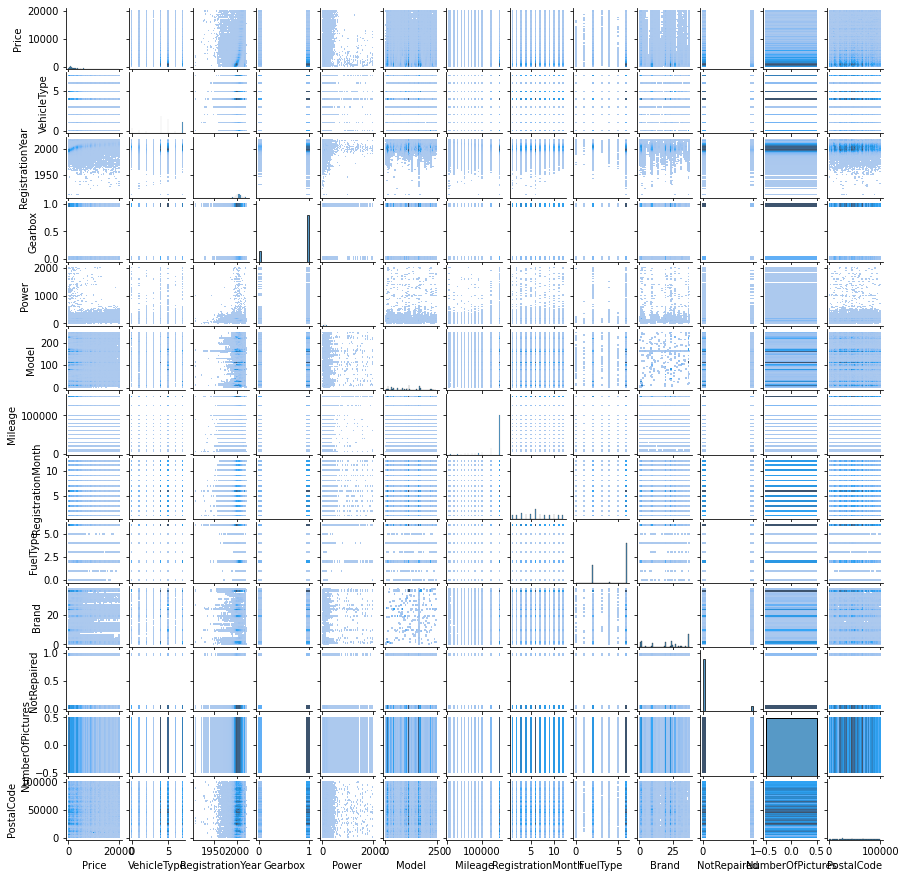

In [248]:
g = sns.pairplot(df_num, kind='hist')
g.fig.set_size_inches(12, 12)

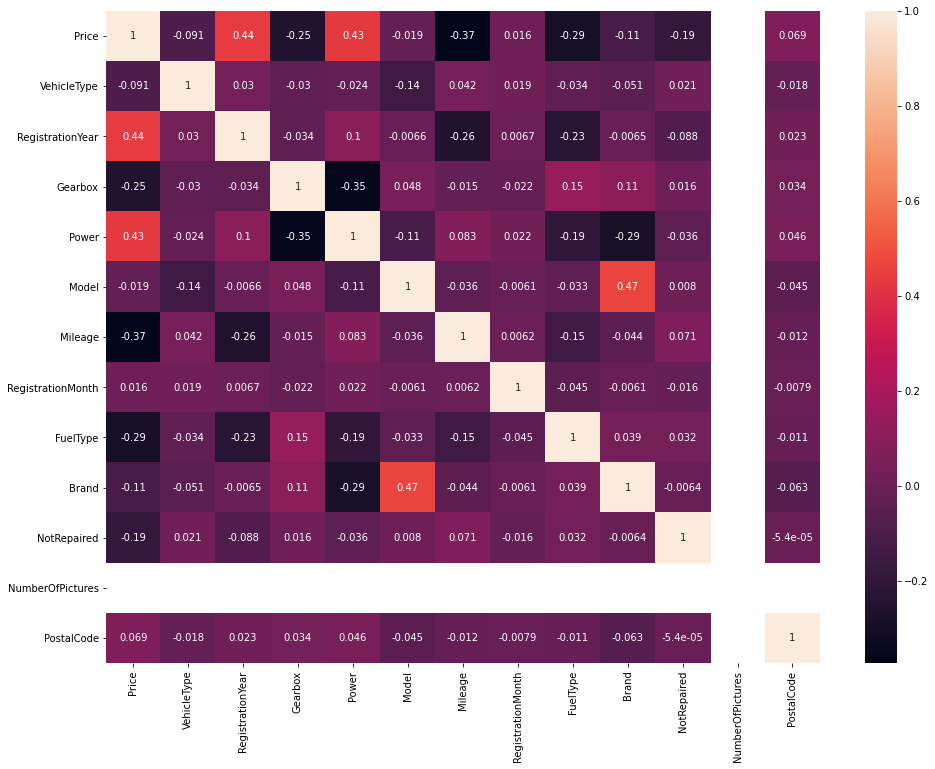

In [249]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_num.corr(), annot=True);

In [250]:
df = df.drop(['DateCrawled', 'DateCreated', 'LastSeen', 'PostalCode', 'NumberOfPictures','VehicleType', 'Model', 'RegistrationMonth', 'Brand', 'NotRepaired'], axis=1)

Data yang tidak digunakan pada analisis dan memiliki korelasi dibawah 0.2 akan dihlangkan dari dataset.

Dari grafik diatas kita dapat melihak beberapa fitur memiliki korelasi yang lebih tinggi terhadap kolom target , seperti registrationyear, power, dan mileage. Selanjutnya kita akan membagi data menjadi tabel fitur(X) dan target(y).

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Pelatihan dan Analisis Model

In [251]:
numeric_features = ['RegistrationYear', 'Power', 'Mileage',]  
categorical_features = ['Gearbox', 'FuelType']  

In [252]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price', axis=1), df['Price'], test_size=0.2, random_state=42)

In [253]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

Pengecekan dilakukan menggunakan beberapa estimator sebagai berikut:
- Decision Tree
- Random Forest
- Linear Regression
- LGBM
- XGBoost
- CatBoost

In [254]:
models = [
    ('Decision Tree', DecisionTreeRegressor(), {}),
]

results = {}
for model_name, model, param_grid in models:
    estimator = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    start_time = time.time()
    grid_search = GridSearchCV(estimator, param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=KFold(n_splits=3, shuffle=True, random_state=42))
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time
    y_pred = grid_search.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[model_name] = {
        'Train_RMSE': -grid_search.best_score_,
        'Test_RMSE': test_rmse,
        'Best_Params': grid_search.best_params_,
        'Train_Time': train_time
    }

for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Train RMSE = {metrics['Train_RMSE']:.4f}")
    print(f"  Test RMSE = {metrics['Test_RMSE']:.4f}")
    print(f"  Best Params = {metrics['Best_Params']}")
    print(f"  Train Time = {metrics['Train_Time']:.2f} seconds")
    print()

Decision Tree:
  Train RMSE = 2185.4822
  Test RMSE = 2120.4711
  Best Params = {}
  Train Time = 3.52 seconds



In [255]:
models = [
    ('Random Forest', RandomForestRegressor(), {}),
]

results = {}
for model_name, model, param_grid in models:
    estimator = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    start_time = time.time()
    grid_search = GridSearchCV(estimator, param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=KFold(n_splits=3, shuffle=True, random_state=42))
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time
    y_pred = grid_search.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[model_name] = {
        'Train_RMSE': -grid_search.best_score_,
        'Test_RMSE': test_rmse,
        'Best_Params': grid_search.best_params_,
        'Train_Time': train_time
    }

for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Train RMSE = {metrics['Train_RMSE']:.4f}")
    print(f"  Test RMSE = {metrics['Test_RMSE']:.4f}")
    print(f"  Best Params = {metrics['Best_Params']}")
    print(f"  Train Time = {metrics['Train_Time']:.2f} seconds")
    print()

Random Forest:
  Train RMSE = 2022.3755
  Test RMSE = 1979.4585
  Best Params = {}
  Train Time = 157.74 seconds



In [256]:
models = [
    ('Linear Regression', LinearRegression(), {}),
]

results = {}
for model_name, model, param_grid in models:
    estimator = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    start_time = time.time()
    grid_search = GridSearchCV(estimator, param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=KFold(n_splits=3, shuffle=True, random_state=42))
    grid_search.fit(X_train, y_train)
    end_time = time.time()   
    train_time = end_time - start_time
    y_pred = grid_search.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[model_name] = {
        'Train_RMSE': -grid_search.best_score_,
        'Test_RMSE': test_rmse,
        'Best_Params': grid_search.best_params_,
        'Train_Time': train_time
    }

for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Train RMSE = {metrics['Train_RMSE']:.4f}")
    print(f"  Test RMSE = {metrics['Test_RMSE']:.4f}")
    print(f"  Best Params = {metrics['Best_Params']}")
    print(f"  Train Time = {metrics['Train_Time']:.2f} seconds")
    print()

Linear Regression:
  Train RMSE = 3222.3337
  Test RMSE = 3213.3802
  Best Params = {}
  Train Time = 1.89 seconds



In [257]:
models = [
    ('LGBM', LGBMRegressor(), {}),
]

results = {}
for model_name, model, param_grid in models:
    estimator = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    start_time = time.time()
    grid_search = GridSearchCV(estimator, param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=KFold(n_splits=3, shuffle=True, random_state=42))
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time
    y_pred = grid_search.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[model_name] = {
        'Train_RMSE': -grid_search.best_score_,
        'Test_RMSE': test_rmse,
        'Best_Params': grid_search.best_params_,
        'Train_Time': train_time
    }

for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Train RMSE = {metrics['Train_RMSE']:.4f}")
    print(f"  Test RMSE = {metrics['Test_RMSE']:.4f}")
    print(f"  Best Params = {metrics['Best_Params']}")
    print(f"  Train Time = {metrics['Train_Time']:.2f} seconds")
    print()

LGBM:
  Train RMSE = 2038.2140
  Test RMSE = 2010.6877
  Best Params = {}
  Train Time = 14.08 seconds



In [258]:
models = [
    ('XGBoost', XGBRegressor(), {}),
]

results = {}
for model_name, model, param_grid in models:
    estimator = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    start_time = time.time()
    grid_search = GridSearchCV(estimator, param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=KFold(n_splits=3, shuffle=True, random_state=42))
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time
    y_pred = grid_search.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[model_name] = {
        'Train_RMSE': -grid_search.best_score_,
        'Test_RMSE': test_rmse,
        'Best_Params': grid_search.best_params_,
        'Train_Time': train_time
    }

for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Train RMSE = {metrics['Train_RMSE']:.4f}")
    print(f"  Test RMSE = {metrics['Test_RMSE']:.4f}")
    print(f"  Best Params = {metrics['Best_Params']}")
    print(f"  Train Time = {metrics['Train_Time']:.2f} seconds")
    print()

XGBoost:
  Train RMSE = 1999.1154
  Test RMSE = 1959.5125
  Best Params = {}
  Train Time = 122.65 seconds



In [259]:
models = [
    ('CatBoost', CatBoostRegressor(silent=True, cat_features=categorical_features), {}),
]

results = {}
for model_name, model, param_grid in models:
    estimator = Pipeline([
        
        ('model', model)
    ])
    
    start_time = time.time()
    grid_search = GridSearchCV(estimator, param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=KFold(n_splits=3, shuffle=True, random_state=42))
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time
    y_pred = grid_search.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[model_name] = {
        'Train_RMSE': -grid_search.best_score_,
        'Test_RMSE': test_rmse,
        'Best_Params': grid_search.best_params_,
        'Train_Time': train_time
    }

for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Train RMSE = {metrics['Train_RMSE']:.4f}")
    print(f"  Test RMSE = {metrics['Test_RMSE']:.4f}")
    print(f"  Best Params = {metrics['Best_Params']}")
    print(f"  Train Time = {metrics['Train_Time']:.2f} seconds")
    print()

CatBoost:
  Train RMSE = 2005.8177
  Test RMSE = 1970.1247
  Best Params = {}
  Train Time = 411.58 seconds



Dari hasil tersebut didapatkan dari 3 algoritma pertama linear regression memiliki train time paling sedikit, tapi random forest lebih akurat. Jika dibandingkan terhadap algoritma gradient boosting kualitas yang didapatkan lebih baik dari linear regression. Selanjutnya dilakukan pemodelan dengan hyperparameter.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

In [260]:
models = [
    ('Decision Tree', DecisionTreeRegressor(), {'model__max_depth': [None, 10, 20], 'model__min_samples_split': [2, 5, 10]}),
]

results = {}
for model_name, model, param_grid in models:
    estimator = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    start_time = time.time()
    grid_search = GridSearchCV(estimator, param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=KFold(n_splits=3, shuffle=True, random_state=42))
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time
    y_pred = grid_search.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[model_name] = {
        'Train_RMSE': -grid_search.best_score_,
        'Test_RMSE': test_rmse,
        'Best_Params': grid_search.best_params_,
        'Train_Time': train_time
    }

for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Train RMSE = {metrics['Train_RMSE']:.4f}")
    print(f"  Test RMSE = {metrics['Test_RMSE']:.4f}")
    print(f"  Best Params = {metrics['Best_Params']}")
    print(f"  Train Time = {metrics['Train_Time']:.2f} seconds")
    print()

Decision Tree:
  Train RMSE = 2101.1006
  Test RMSE = 2052.4982
  Best Params = {'model__max_depth': 20, 'model__min_samples_split': 10}
  Train Time = 18.80 seconds



In [261]:
models = [
    ('Random Forest', RandomForestRegressor(), {'model__n_estimators': [100, 200], 'model__max_depth': [None, 10]}),
]

results = {}
for model_name, model, param_grid in models:
    estimator = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    start_time = time.time()
    grid_search = GridSearchCV(estimator, param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=KFold(n_splits=3, shuffle=True, random_state=42))
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time
    y_pred = grid_search.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[model_name] = {
        'Train_RMSE': -grid_search.best_score_,
        'Test_RMSE': test_rmse,
        'Best_Params': grid_search.best_params_,
        'Train_Time': train_time
    }

for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Train RMSE = {metrics['Train_RMSE']:.4f}")
    print(f"  Test RMSE = {metrics['Test_RMSE']:.4f}")
    print(f"  Best Params = {metrics['Best_Params']}")
    print(f"  Train Time = {metrics['Train_Time']:.2f} seconds")
    print()

Random Forest:
  Train RMSE = 2021.4581
  Test RMSE = 1979.0148
  Best Params = {'model__max_depth': None, 'model__n_estimators': 200}
  Train Time = 635.54 seconds



In [262]:
models = [
    ('Linear Regression', LinearRegression(), {}),
]

results = {}
for model_name, model, param_grid in models:
    estimator = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    start_time = time.time()
    grid_search = GridSearchCV(estimator, param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=KFold(n_splits=3, shuffle=True, random_state=42))
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time
    y_pred = grid_search.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[model_name] = {
        'Train_RMSE': -grid_search.best_score_,
        'Test_RMSE': test_rmse,
        'Best_Params': grid_search.best_params_,
        'Train_Time': train_time
    }

for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Train RMSE = {metrics['Train_RMSE']:.4f}")
    print(f"  Test RMSE = {metrics['Test_RMSE']:.4f}")
    print(f"  Best Params = {metrics['Best_Params']}")
    print(f"  Train Time = {metrics['Train_Time']:.2f} seconds")
    print()

Linear Regression:
  Train RMSE = 3222.3337
  Test RMSE = 3213.3802
  Best Params = {}
  Train Time = 1.94 seconds



In [263]:
models = [
    ('LGBM', LGBMRegressor(), {'model__n_estimators': [100, 200], 'model__max_depth': [5, 10]}),
]

results = {}
for model_name, model, param_grid in models:
    estimator = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    start_time = time.time()
    grid_search = GridSearchCV(estimator, param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=KFold(n_splits=3, shuffle=True, random_state=42))
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time
    y_pred = grid_search.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[model_name] = {
        'Train_RMSE': -grid_search.best_score_,
        'Test_RMSE': test_rmse,
        'Best_Params': grid_search.best_params_,
        'Train_Time': train_time
    }

for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Train RMSE = {metrics['Train_RMSE']:.4f}")
    print(f"  Test RMSE = {metrics['Test_RMSE']:.4f}")
    print(f"  Best Params = {metrics['Best_Params']}")
    print(f"  Train Time = {metrics['Train_Time']:.2f} seconds")
    print()

LGBM:
  Train RMSE = 2010.4861
  Test RMSE = 1977.3689
  Best Params = {'model__max_depth': 10, 'model__n_estimators': 200}
  Train Time = 64.58 seconds



In [264]:
models = [
    ('XGBoost', XGBRegressor(), {'model__n_estimators': [100, 200], 'model__max_depth': [5, 10]}),
]

results = {}
for model_name, model, param_grid in models:
    estimator = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    start_time = time.time()
    grid_search = GridSearchCV(estimator, param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=KFold(n_splits=3, shuffle=True, random_state=42))
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time
    y_pred = grid_search.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[model_name] = {
        'Train_RMSE': -grid_search.best_score_,
        'Test_RMSE': test_rmse,
        'Best_Params': grid_search.best_params_,
        'Train_Time': train_time
    }

for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Train RMSE = {metrics['Train_RMSE']:.4f}")
    print(f"  Test RMSE = {metrics['Test_RMSE']:.4f}")
    print(f"  Best Params = {metrics['Best_Params']}")
    print(f"  Train Time = {metrics['Train_Time']:.2f} seconds")
    print()

XGBoost:
  Train RMSE = 1986.5401
  Test RMSE = 1940.1171
  Best Params = {'model__max_depth': 10, 'model__n_estimators': 100}
  Train Time = 713.40 seconds



In [265]:
models = [
    ('CatBoost', CatBoostRegressor(silent=True, cat_features=categorical_features), {'model__iterations': [100, 200], 'model__depth': [6, 8]}),
]

results = {}
for model_name, model, param_grid in models:
    estimator = Pipeline([
        
        ('model', model)
    ])
    
    start_time = time.time()
    grid_search = GridSearchCV(estimator, param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=KFold(n_splits=3, shuffle=True, random_state=42))
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time
    y_pred = grid_search.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[model_name] = {
        'Train_RMSE': -grid_search.best_score_,
        'Test_RMSE': test_rmse,
        'Best_Params': grid_search.best_params_,
        'Train_Time': train_time
    }

for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Train RMSE = {metrics['Train_RMSE']:.4f}")
    print(f"  Test RMSE = {metrics['Test_RMSE']:.4f}")
    print(f"  Best Params = {metrics['Best_Params']}")
    print(f"  Train Time = {metrics['Train_Time']:.2f} seconds")
    print()

CatBoost:
  Train RMSE = 1997.3626
  Test RMSE = 1965.4783
  Best Params = {'model__depth': 8, 'model__iterations': 200}
  Train Time = 209.25 seconds



In [266]:


%%time
model = LGBMRegressor(**best_params)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print('RMSE on test sample:', mean_squared_error(y_test, predictions)**0.5)



NameError: name 'best_params' is not defined

setelah penambahan beberapa hyperparameter diketahui bahwa kualitas yang didapatkan menjadi mirip satu sama lain, dengan decision tree sebagai estimator tercepat, sedangkan estimator gradient boosting tercepat adalah LGBM. XGBoost memiliki kualitas hasil terbaik, tapi waktu yang dibutuhkan cukup tinggi.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Kesimpulan Umum

Berikut Rekap hasil pemodelan.

### Pemodelan tanpa hyperparameter, dan dengan cross validation.
- Decision Tree:
  - Train RMSE = 2186.6944
  - Test RMSE = 2125.0100
  - Best Params = {}
  - Train Time = 2.95 seconds

- Random Forest:
  - Train RMSE = 2022.8655
  - Test RMSE = 1979.2084
  - Best Params = {}
  - Train Time = 150.80 seconds
  
- Linear Regression:
  - Train RMSE = 3222.3337
  - Test RMSE = 3213.3802
  - Best Params = {}
  - Train Time = 1.90 seconds
  
- LGBM:
  - Train RMSE = 2038.2140
  - Test RMSE = 2010.6877
  - Best Params = {}
  - Train Time = 12.31 seconds

- XGBoost:
  - Train RMSE = 1999.1154
  - Test RMSE = 1959.5125
  - Best Params = {}
  - Train Time = 112.14 seconds

- CatBoost:
  - Train RMSE = 2005.8177
  - Test RMSE = 1970.1247
  - Best Params = {}
  - Train Time = 398.06 seconds  

### Pemodelan dengan hyperparameter, dan dengan cross validation.
- Decision Tree:
  - Train RMSE = 2101.4048
  - Test RMSE = 2054.7159
  - Best Params = {'model__max_depth': 20, 'model__min_samples_split': 10}
  - Train Time = 17.64 seconds
- Random Forest:
  - Train RMSE = 2022.0741
  - Test RMSE = 1977.7517
  - Best Params = {'model__max_depth': None, 'model__n_estimators': 200}
  - Train Time = 585.69 seconds
- Linear Regression:
  - Train RMSE = 3222.3337
  - Test RMSE = 3213.3802
  - Best Params = {}
  - Train Time = 1.83 seconds
- LGBM:
  - Train RMSE = 2010.4861
  - Test RMSE = 1977.3689
  - Best Params = {'model__max_depth': 10, 'model__n_estimators': 200}
  - Train Time = 55.01 seconds
- XGBoost:
  - Train RMSE = 1986.5401
  - Test RMSE = 1940.1171
  - Best Params = {'model__max_depth': 10, 'model__n_estimators': 100}
  - Train Time = 657.33 seconds
- CatBoost:
  - Train RMSE = 1997.3626
  - Test RMSE = 1965.4783
  - Best Params = {'model__depth': 8, 'model__iterations': 200}
  - Train Time = 204.02 seconds

- Pada proyek ini kita membuat sebuah model untuk memprediksi harga mobil dengan dataset yang telah disediakan.
- Dataset yang digunakan adalah data historis kendaraan sejumlah baris dan 16 kolom.
- Berdasarkan label datasetnya model yang digunakan bersifat regresi.
- Pada proyek ini analisa regresi akan dilakukan menggunakan algoritma regresi dan gradient boosting.
- kolom yang bertipe object diubah menjadi numerik dengan one hot encoding
- Dataset yang digunakan dibagi menjadi train, dan test set dengan validation menggunakan cross- validation.
- Standardization dilakukan terhadap kolom numerik untuk meningkatkan performa model.
- Algoritma regresi yang digunakan yaitu; decision tree, random forest, dan linear regression.
- Algoritma gradient booster yang digunakan yaitu; LGBM, XGBoost, dan CatBoost.
- Dari hasil pemodelan didapatkan estimator dengan gradient boosting membutuhkan waktu lebih banyak tapi memiliki kualitas yang lebih baik.
- Algoritma LGBM memiliki waktu dan kualitas yang baik dibanding algoritma lainnya.
- Penggunaan hyperparameter lain tentu akan memengaruhi hasil yang ada.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# Daftar Periksa

Ketik 'x' untuk menandakannya sebagai selesai. Lalu, tekan tombol Shift+Enter

- [x]  Jupyter Notebook bisa dibuka
- [ ]  Tidak ada kesalahan pada kode
- [ ]  Sel-sel dengan kode telah disusun berdasarkan urutan eksekusi
- [ ]  Data telah diunduh dan disiapkan- [ ]  Model sudah dilatih
- [ ]  Analisis terhadap kecepatan dan kualitas model telah dilakukan